In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd


In [2]:
paired_colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
                 '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
                 '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
                 '#17becf', '#9edae5']

In [3]:
import pandas as pd


In [7]:
filename = '/home/gayane/BartLM/Bart/chemical/mess_folder/sentiment.csv'
df = pd.read_csv(filename)

In [8]:
df.head()

,#,Status,Task,Trainer,Data path,Model path,Special Args,C,feat.s indices,# feat.s,accuracy,auroc,auroc (fine-tuned),distribution
0,1,DONE,clintox_0,logistic_regression_l1+regularizer,/home/gayane/BartLM/Bart/chemical/checkpoints/...,/home/gayane/BartLM/Bart/chemical/checkpoints/...,{pooling: avg},0.003906,[10],1,94.03,76.98,99.2,NaN
1,2,DONE,clintox_0,logistic_regression_l1+regularizer,/home/gayane/BartLM/Bart/chemical/checkpoints/...,/home/gayane/BartLM/Bart/chemical/checkpoints/...,{pooling: avg},0.007812,[10],1,94.03,76.98,99.2,NaN
2,3,DONE,clintox_0,logistic_regression_l1+regularizer,/home/gayane/BartLM/Bart/chemical/checkpoints/...,/home/gayane/BartLM/Bart/chemical/checkpoints/...,{pooling: avg},0.015625,"[10, 663]",2,94.03,78.27,99.2,NaN
3,4,DONE,clintox_0,logistic_regression_l1+regularizer,/home/gayane/BartLM/Bart/chemical/checkpoints/...,/home/gayane/BartLM/Bart/chemical/checkpoints/...,{pooling: avg},0.031250,"[10, 320, 350, 527, 601, 634, 663]",7,94.03,98.71,99.2,NaN
4,5,DONE,clintox_0,logistic_regression_l1+regularizer,/home/gayane/BartLM/Bart/chemical/checkpoints/...,/home/gayane/BartLM/Bart/chemical/checkpoints/...,{pooling: avg},0.062500,"[196, 258, 320, 350, 369, 431, 527, 539, 601, ...",21,98.51,99.50,99.2,NaN
5,6,DONE,clintox_0,logistic_regression_l1+regularizer,/home/gayane/BartLM/Bart/chemical/checkpoints/...,/home/gayane/BartLM/Bart/chemical/checkpoints/...,{pooling: avg},0.125000,"[172, 196, 258, 320, 350, 353, 431, 527, 539, ...",29,98.51,99.21,99.2,NaN
6,7,DONE,clintox_0,logistic_regression_l1+regularizer,/home/gayane/BartLM/Bart/chemical/checkpoints/...,/home/gayane/BartLM/Bart/chemical/checkpoints/...,{pooling: avg},0.250000,"[62, 72, 149, 171, 172, 182, 196, 257, 258, 27...",48,98.51,98.81,99.2,NaN
7,8,DONE,clintox_0,logistic_regression_l1+regularizer,/home/gayane/BartLM/Bart/chemical/checkpoints/...,/home/gayane/BartLM/Bart/chemical/checkpoints/...,{pooling: avg},0.500000,"[2, 9, 14, 31, 62, 110, 149, 171, 172, 182, 19...",70,98.51,98.12,99.2,NaN
8,9,DONE,clintox_0,logistic_regression_l1+regularizer,/home/gayane/BartLM/Bart/chemical/checkpoints/...,/home/gayane/BartLM/Bart/chemical/checkpoints/...,{pooling: avg},1.000000,"[2, 9, 10, 14, 20, 31, 62, 71, 102, 110, 149, ...",81,98.51,98.31,99.2,NaN
9,19,DONE,clintox_1,logistic_regression_l1+regularizer,/home/gayane/BartLM/Bart/chemical/checkpoints/...,/home/gayane/BartLM/Bart/chemical/checkpoints/...,{pooling: avg},0.003906,[10],1,93.28,76.00,98.6,NaN


In [9]:
tasks = list(df.Task.unique())

In [10]:
df.columns

Index(['#', 'Status', 'Task', 'Trainer', 'Data path', 'Model path',
       'Special Args', 'C', 'feat.s indices', '# feat.s', 'accuracy', 'auroc',
       'auroc (fine-tuned)', 'distribution'],
      dtype='object')

In [11]:
df.C.min()

0.00390625

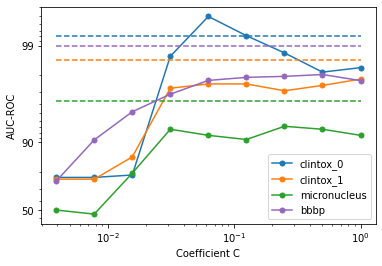

In [12]:
plt.figure()
for i, task in enumerate(tasks):
    if task == 'sider_0':
        continue
    plt.plot(
        df.C[df.Task == task],
        100 - df.auroc[df.Task == task],
        color = paired_colors[2*i],
        marker = 'o',
        markersize = 5,
        label = task
    )
    finetuned = 100 - df['auroc (fine-tuned)'][df.Task == task].max()
    plt.plot([df.C.min(), df.C.max()], [finetuned, finetuned], paired_colors[2*i], 
             linestyle='dashed')
plt.legend()
# plt.ylim(60, 105)
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_yaxis()
yticks = np.array([1, 10, 50])
plt.yticks(yticks, 100 - yticks)

plt.xlabel("Coefficient C")
plt.ylabel("AUC-ROC");

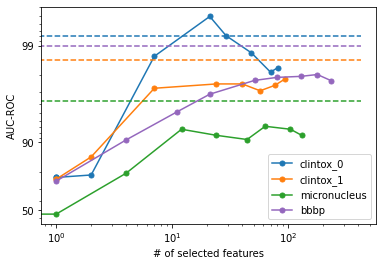

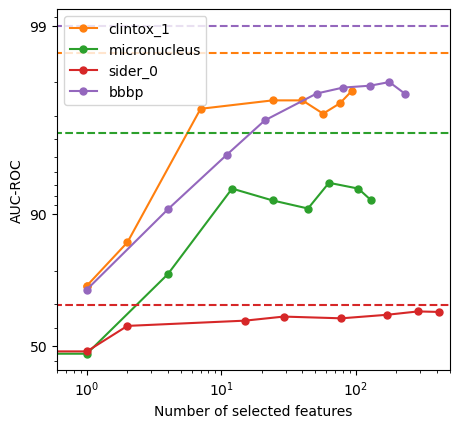

In [44]:
plt.figure(dpi=100, figsize=(4.7, 4.7))
for i, task in enumerate(tasks):
    if task == 'clintox_0':
        continue
    plt.plot(
        df['# feat.s'][df.Task == task],
        100 - df.auroc[df.Task == task],
        color = paired_colors[2*i],
        marker = 'o',
        markersize = 5,
        label = task
    )
    finetuned = 100 - df['auroc (fine-tuned)'][df.Task == task].max()
    plt.plot([df['# feat.s'].min(), df['# feat.s'].max() + 100], [finetuned, finetuned], paired_colors[2*i], 
             linestyle='dashed')
plt.legend()
# plt.ylim(60, 105)
plt.xlim(0.6, 500)
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_yaxis()
yticks = np.array([1, 10, 50])
plt.yticks(yticks, 100 - yticks)

plt.gca().set_aspect(1.4)

plt.xlabel("Number of selected features")
plt.ylabel("AUC-ROC");

plt.tight_layout()

plt.savefig("sentiment.pdf", pad_inches=0)